In [52]:
%matplotlib inline

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats

In [54]:
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [55]:
#File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [56]:
#Reads the Mouse Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [57]:
# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_df = pd.read_csv(clinical_trial_data)
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [58]:
# Combine the data into a single dataset
clinical_mouse_merged = pd.merge(clinical_trial_df, mouse_drug_df,on ="Mouse ID",how='outer')
# Display the data table for preview
clinical_mouse_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [59]:
#select_four_drugs_df = clinical_mouse_merged.loc [(clinical_mouse_merged["Drug"] == "Capomulin") | (clinical_mouse_merged["Drug"] == "Infubinol") | (clinical_mouse_merged["Drug"] == "Ketapril") | (clinical_mouse_merged["Drug"] == "Placebo"), :]
#select_four_drugs_df.head()
select_drugs_df = clinical_mouse_merged.loc [(clinical_mouse_merged["Drug"] == "Capomulin") | (clinical_mouse_merged["Drug"] == "Ceftamin") | (clinical_mouse_merged["Drug"] == "Infubinol") | (clinical_mouse_merged["Drug"] == "Ketapril") | (clinical_mouse_merged["Drug"] == "Naftisol") |(clinical_mouse_merged["Drug"] == "Placebo") | (clinical_mouse_merged["Drug"] == "Propriva") | (clinical_mouse_merged["Drug"] == "Ramicane") | (clinical_mouse_merged["Drug"] == "Stelasyn") | (clinical_mouse_merged["Drug"] == "Zoniferol"), :]
select_drugs_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [60]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mean_tumor = select_drugs_df.groupby(['Drug','Timepoint'])
grouped_mean_tumor_df = pd.DataFrame(grouped_mean_tumor["Tumor Volume (mm3)"].sem())
grouped_mean_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [61]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sterror_capomulin_df = grouped_mean_tumor_df.loc['Capomulin',["Tumor Volume (mm3)"]]
sterror_capomulin = sterror_capomulin_df.iloc[:, 0].values

sterror_ceftamin_df = grouped_mean_tumor_df.loc['Ceftamin',["Tumor Volume (mm3)"]]
sterror_ceftamin = sterror_ceftamin_df.iloc[:, 0].values

sterror_infubinol_df = grouped_mean_tumor_df.loc['Infubinol',["Tumor Volume (mm3)"]]
sterror_infubinol = sterror_infubinol_df.iloc[:, 0].values

sterror_ketapril_df = grouped_mean_tumor_df.loc['Ketapril',["Tumor Volume (mm3)"]]
sterror_ketapril = sterror_ketapril_df.iloc[:, 0].values

sterror_naftisol_df = grouped_mean_tumor_df.loc['Naftisol',["Tumor Volume (mm3)"]]
sterror_naftisol = sterror_naftisol_df.iloc[:, 0].values

sterror_placebo_df = grouped_mean_tumor_df.loc['Placebo',["Tumor Volume (mm3)"]]
sterror_placebo = sterror_placebo_df.iloc[:, 0].values

sterror_propriva_df = grouped_mean_tumor_df.loc['Propriva',["Tumor Volume (mm3)"]]
sterror_propriva = sterror_propriva_df.iloc[:, 0].values

sterror_ramicane_df = grouped_mean_tumor_df.loc['Ramicane',["Tumor Volume (mm3)"]]
sterror_ramicane = sterror_ramicane_df.iloc[:, 0].values

sterror_stelasyn_df = grouped_mean_tumor_df.loc['Stelasyn',["Tumor Volume (mm3)"]]
sterror_stelasyn = sterror_stelasyn_df.iloc[:, 0].values

sterror_zoniferol_df = grouped_mean_tumor_df.loc['Zoniferol',["Tumor Volume (mm3)"]]
sterror_zoniferol = sterror_zoniferol_df.iloc[:, 0].values

# Convert to DataFrame
tumor_avg_df = pd.DataFrame(grouped_mean_tumor["Tumor Volume (mm3)"].mean())
tumor_avg_df.reset_index(inplace = True)

# Preview DataFrame
tumor_avg_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [62]:
# Minor Data Munging to Re-Format the Data Frames
reform_capomulin_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df = reform_capomulin_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})

reform_ceftamin_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df = reform_ceftamin_df.rename(columns={"Tumor Volume (mm3)":"Ceftamin"})

reform_infubinol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df = reform_infubinol_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})

reform_ketapril_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df = reform_ketapril_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})

reform_naftisol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df = reform_naftisol_df.rename(columns={"Tumor Volume (mm3)":"Naftisol"})

reform_placebo_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df = reform_placebo_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})

reform_propriva_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df = reform_propriva_df.rename(columns={"Tumor Volume (mm3)":"Propriva"})

reform_ramicane_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df = reform_ramicane_df.rename(columns={"Tumor Volume (mm3)":"Ramicane"})

reform_stelasyn_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df = reform_stelasyn_df.rename(columns={"Tumor Volume (mm3)":"Stelasyn"})

reform_zoniferol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df = reform_zoniferol_df.rename(columns={"Tumor Volume (mm3)":"Zoniferol"})

first_merge_df=pd.merge(reform_capomulin_renamed_df, reform_ceftamin_renamed_df, on="Timepoint")
second_merge_df=pd.merge(first_merge_df, reform_infubinol_renamed_df, on="Timepoint")
third_merge_df=pd.merge(second_merge_df, reform_ketapril_renamed_df, on="Timepoint")
fourth_merge_df=pd.merge(third_merge_df, reform_naftisol_renamed_df, on="Timepoint")
fifth_merge_df=pd.merge(fourth_merge_df, reform_placebo_renamed_df, on="Timepoint")
sixth_merge_df=pd.merge(fifth_merge_df, reform_propriva_renamed_df, on="Timepoint")
seventh_merge_df=pd.merge(sixth_merge_df, reform_ramicane_renamed_df, on="Timepoint")
eighth_merge_df=pd.merge(seventh_merge_df, reform_stelasyn_renamed_df, on="Timepoint")
ninth_merge_df=pd.merge(eighth_merge_df, reform_zoniferol_renamed_df, on="Timepoint")

#Dropping Excess Columns
ninth_merge_drop_df = ninth_merge_df.drop(["Drug_x","Drug_y"],axis=1)
ninth_merge_drop_df.head()


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


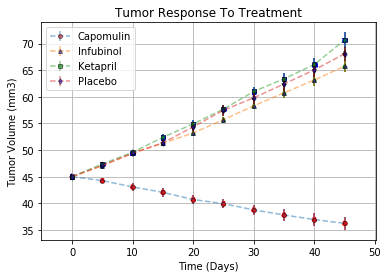

In [63]:
tumor_treatment_df = ninth_merge_drop_df[["Timepoint", "Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]]
tumor_treatment_df

tumor_treatment_df['Timepoint'] = tumor_treatment_df['Timepoint'].astype(float)
tumor_treatment_df.dtypes

ax=tumor_treatment_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=sterror_capomulin);
ax.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Capomulin'], yerr=sterror_capomulin, fmt='o', mfc='r', mec='k', ms=4, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='^', yerr = sterror_infubinol, ax=ax);
ax.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Infubinol'], yerr=sterror_infubinol, fmt='^', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='s',  yerr = sterror_ketapril,  ax=ax);
ax.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Ketapril'], yerr=sterror_ketapril, fmt='s', mfc='g', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='d',  yerr = sterror_placebo,  ax=ax);
ax.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Placebo'], yerr=sterror_placebo, fmt='d', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Placebo")

xlim = ax.get_xlim()
n = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + n) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response To Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("Tumor_Response_To_Treatment.png")
plt.show()


## Metastatic Response to Treatment

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_grouped_response = select_drugs_df.groupby(['Drug','Timepoint'])
meta_grouped_response_df = pd.DataFrame(meta_response["Metastatic Sites"].mean())
meta_grouped_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [65]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sterror_capomulin_df_1 = meta_grouped_response_df.loc['Capomulin',["Metastatic Sites"]]
sterror_capomulin_1 = sterror_capomulin_df_1.iloc[:, 0].values

sterror_ceftamin_df_1 = meta_grouped_response_df.loc['Ceftamin',["Metastatic Sites"]]
sterror_ceftamin_1 = sterror_ceftamin_df_1.iloc[:, 0].values

sterror_infubinol_df_1 = meta_grouped_response_df.loc['Infubinol',["Metastatic Sites"]]
sterror_infubinol_1 = sterror_infubinol_df_1.iloc[:, 0].values

sterror_ketapril_df_1 = meta_grouped_response_df.loc['Ketapril',["Metastatic Sites"]]
sterror_ketapril_1 = sterror_ketapril_df_1.iloc[:, 0].values

sterror_naftisol_df_1 = meta_grouped_response_df.loc['Naftisol',["Metastatic Sites"]]
sterror_naftisol_1 = sterror_naftisol_df_1.iloc[:, 0].values

sterror_placebo_df_1 = meta_grouped_response_df.loc['Placebo',["Metastatic Sites"]]
sterror_placebo_1 = sterror_placebo_df_1.iloc[:, 0].values

sterror_propriva_df_1 = meta_grouped_response_df.loc['Propriva',["Metastatic Sites"]]
sterror_propriva_1 = sterror_propriva_df_1.iloc[:, 0].values

sterror_ramicane_df_1 = meta_grouped_response_df.loc['Ramicane',["Metastatic Sites"]]
sterror_ramicane_1 = sterror_ramicane_df_1.iloc[:, 0].values

sterror_stelasyn_df_1 = meta_grouped_response_df.loc['Stelasyn',["Metastatic Sites"]]
sterror_stelasyn_1 = sterror_stelasyn_df_1.iloc[:, 0].values

sterror_zoniferol_df_1 = meta_grouped_response_df.loc['Zoniferol',["Metastatic Sites"]]
sterror_zoniferol_1 = sterror_zoniferol_df_1.iloc[:, 0].values

# Convert to DataFrame
meta_avg_df = pd.DataFrame(meta_grouped_response["Metastatic Sites"].mean())
meta_avg_df.reset_index(inplace = True)

# Preview DataFrame
meta_avg_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [66]:
# Minor Data Munging to Re-Format the Data Frames
reform_capomulin_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df_1 = reform_capomulin_df_1.rename(columns={"Metastatic Sites":"Capomulin"})

reform_ceftamin_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df_1 = reform_ceftamin_df_1.rename(columns={"Metastatic Sites":"Ceftamin"})

reform_infubinol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df_1 = reform_infubinol_df_1.rename(columns={"Metastatic Sites":"Infubinol"})

reform_ketapril_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df_1 = reform_ketapril_df_1.rename(columns={"Metastatic Sites":"Ketapril"})

reform_naftisol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df_1 = reform_naftisol_df_1.rename(columns={"Metastatic Sites":"Naftisol"})

reform_placebo_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df_1 = reform_placebo_df_1.rename(columns={"Metastatic Sites":"Placebo"})

reform_propriva_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df_1 = reform_propriva_df_1.rename(columns={"Metastatic Sites":"Propriva"})

reform_ramicane_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df_1 = reform_ramicane_df_1.rename(columns={"Metastatic Sites":"Ramicane"})

reform_stelasyn_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df_1 = reform_stelasyn_df_1.rename(columns={"Metastatic Sites":"Stelasyn"})

reform_zoniferol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df_1 = reform_zoniferol_df_1.rename(columns={"Metastatic Sites":"Zoniferol"})

first_merge_df_1=pd.merge(reform_capomulin_renamed_df_1, reform_ceftamin_renamed_df_1, on="Timepoint")
second_merge_df_1=pd.merge(first_merge_df_1, reform_infubinol_renamed_df_1, on="Timepoint")
third_merge_df_1=pd.merge(second_merge_df_1, reform_ketapril_renamed_df_1, on="Timepoint")
fourth_merge_df_1=pd.merge(third_merge_df_1, reform_naftisol_renamed_df_1, on="Timepoint")
fifth_merge_df_1=pd.merge(fourth_merge_df_1, reform_placebo_renamed_df_1, on="Timepoint")
sixth_merge_df_1=pd.merge(fifth_merge_df_1, reform_propriva_renamed_df_1, on="Timepoint")
seventh_merge_df_1=pd.merge(sixth_merge_df_1, reform_ramicane_renamed_df_1, on="Timepoint")
eighth_merge_df_1=pd.merge(seventh_merge_df_1, reform_stelasyn_renamed_df_1, on="Timepoint")
ninth_merge_df_1=pd.merge(eighth_merge_df_1, reform_zoniferol_renamed_df_1, on="Timepoint")

#Dropping Excess Columns
ninth_merge_drop_df_1 = ninth_merge_df_1.drop(["Drug_x","Drug_y"],axis=1)
# Preview that Reformatting worked
ninth_merge_drop_df_1.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


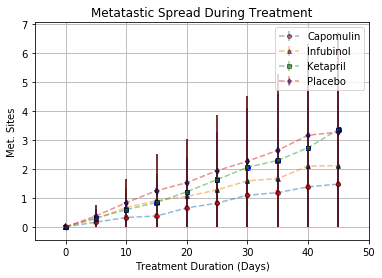

In [67]:
# Generate the Plot (with Error Bars)
meta_treatment_df = ninth_merge_drop_df_1[["Timepoint", "Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]]
meta_treatment_df

meta_treatment_df['Timepoint'] = meta_treatment_df['Timepoint'].astype(float)
meta_treatment_df.dtypes

ax=meta_treatment_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=sterror_capomulin_1);
ax.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Capomulin'], yerr=sterror_capomulin_1, fmt='o', mfc='r', mec='k', ms=4, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='^', yerr = sterror_infubinol_1, ax=ax);
ax.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Infubinol'], yerr=sterror_infubinol_1, fmt='^', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='s',  yerr = sterror_ketapril_1,  ax=ax);
ax.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Ketapril'], yerr=sterror_ketapril_1, fmt='s', mfc='g', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='d',  yerr = sterror_placebo_1,  ax=ax);
ax.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Placebo'], yerr=sterror_placebo_1, fmt='d', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Placebo")

xlim = ax.get_xlim()
n = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + n) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metatastic Spread During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [68]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count_df=pd.DataFrame(grouped_mean_tumor["Mouse ID"].count())
mice_count_renamed_df= mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})
mice_count_renamed_df.reset_index(inplace=True)
# Preview DataFrame
mice_count_renamed_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [75]:
# Minor Data Munging to Re-Format the Data Frames
reform_capomulin_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df_2 = reform_capomulin_df_2.rename(columns={"Mouse Count":"Capomulin"})

reform_ceftamin_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df_2 = reform_ceftamin_df_2.rename(columns={"Mouse Count":"Ceftamin"})

reform_infubinol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df_2 = reform_infubinol_df_2.rename(columns={"Mouse Count":"Infubinol"})

reform_ketapril_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df_2 = reform_ketapril_df_2.rename(columns={"Mouse Count":"Ketapril"})

reform_naftisol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df_2 = reform_naftisol_df_2.rename(columns={"Mouse Count":"Naftisol"})

reform_placebo_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df_2 = reform_placebo_df_2.rename(columns={"Mouse Count":"Placebo"})

reform_propriva_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df_2 = reform_propriva_df_2.rename(columns={"Mouse Count":"Propriva"})

reform_ramicane_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df_2 = reform_ramicane_df_2.rename(columns={"Mouse Count":"Ramicane"})

reform_stelasyn_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df_2 = reform_stelasyn_df_2.rename(columns={"Mouse Count":"Stelasyn"})

reform_zoniferol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df_2 = reform_zoniferol_df_2.rename(columns={"Mouse Count":"Zoniferol"})

first_merge_df_2=pd.merge(reform_capomulin_renamed_df_2, reform_ceftamin_renamed_df_2, on="Timepoint")
second_merge_df_2=pd.merge(first_merge_df_2, reform_infubinol_renamed_df_2, on="Timepoint")
third_merge_df_2=pd.merge(second_merge_df_2, reform_ketapril_renamed_df_2, on="Timepoint")
fourth_merge_df_2=pd.merge(third_merge_df_2, reform_naftisol_renamed_df_2, on="Timepoint")
fifth_merge_df_2=pd.merge(fourth_merge_df_2, reform_placebo_renamed_df_2, on="Timepoint")
sixth_merge_df_2=pd.merge(fifth_merge_df_2, reform_propriva_renamed_df_2, on="Timepoint")
seventh_merge_df_2=pd.merge(sixth_merge_df_2, reform_ramicane_renamed_df_2, on="Timepoint")
eighth_merge_df_2=pd.merge(seventh_merge_df_2, reform_stelasyn_renamed_df_2, on="Timepoint")
ninth_merge_df_2=pd.merge(eighth_merge_df_2, reform_zoniferol_renamed_df_2, on="Timepoint")

ninth_merge_drop_df_2 = ninth_merge_df_2.drop(["Drug_x","Drug_y"],axis=1)
# Preview that Reformatting worked
ninth_merge_drop_df_2.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [78]:
ninth_merge_drop_df_2 = ninth_merge_drop_df_2.astype(float)
ninth_merge_drop_df_2.dtypes

ninth_merge_drop_df_2["Capomulin Percent"]=ninth_merge_drop_df_2["Capomulin"]/ninth_merge_drop_df_2["Capomulin"].iloc[0] * 100
ninth_merge_drop_df_2["Infubinol Percent"]=ninth_merge_drop_df_2["Infubinol"]/ninth_merge_drop_df_2["Infubinol"].iloc[0] * 100
ninth_merge_drop_df_2["Ketapril Percent"]=ninth_merge_drop_df_2["Ketapril"]/ninth_merge_drop_df_2["Ketapril"].iloc[0] * 100
ninth_merge_drop_df_2["Placebo Percent"]=ninth_merge_drop_df_2["Placebo"]/ninth_merge_drop_df_2["Placebo"].iloc[0] * 100
ninth_merge_drop_df_2.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin Percent,Infubinol Percent,Ketapril Percent,Placebo Percent
0,0.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0,100.0,84.0,88.0,96.0
3,15.0,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0,96.0,84.0,76.0,80.0
4,20.0,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0,92.0,80.0,76.0,76.0


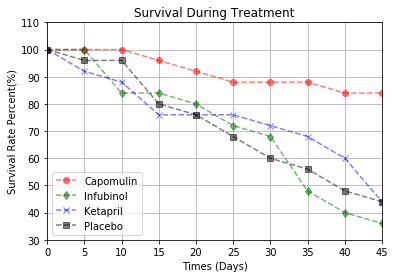

In [79]:
# Generate the Plot (Accounting for percentages)
ax=ninth_merge_drop_df_2.plot(kind='line', x='Timepoint',y='Capomulin Percent', linestyle='--', color='red', marker='o', alpha=0.5, label="Capomulin");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Infubinol Percent', linestyle='--', color='DarkGreen', marker='d', ax=ax, alpha=0.5, label="Infubinol");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Ketapril Percent', linestyle='--', color='blue', marker='x',  ax=ax,  alpha=0.5, label="Ketapril");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Placebo Percent', linestyle='--', color='black', marker='s', ax=ax,  alpha=0.5, label="Placebo");

ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 110)
ax.grid()
ax.set_xlabel("Times (Days)")
ax.set_ylabel("Survival Rate Percent(%)")
ax.set_title("Survival During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
# Save the Figure
plt.savefig("Survival_During_Treatment.png")
# Show the Figure
plt.show()

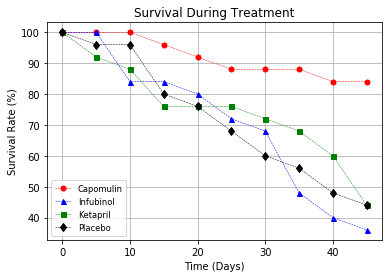

## Summary Bar Graph

In [88]:
# Calculate the percent changes for each drug

Capomulin_tumorvolume_changepercent=(ninth_merge_drop_df["Capomulin"].iloc[9]-ninth_merge_drop_df["Capomulin"].iloc[0])/ninth_merge_drop_df["Capomulin"].iloc[0]*100
Capomulin_tumorvolume_changepercent

Infubinol_tumorvolume_changepercent=(ninth_merge_drop_df["Infubinol"].iloc[9]-ninth_merge_drop_df["Infubinol"].iloc[0])/ninth_merge_drop_df["Infubinol"].iloc[0]*100
Infubinol_tumorvolume_changepercent

Ketapril_tumorvolume_changepercent=(ninth_merge_drop_df["Ketapril"].iloc[9]-ninth_merge_drop_df["Ketapril"].iloc[0])/ninth_merge_drop_df["Ketapril"].iloc[0]*100
Ketapril_tumorvolume_changepercent

Placebo_tumorvolume_changepercent=(ninth_merge_drop_df["Placebo"].iloc[9]-ninth_merge_drop_df["Placebo"].iloc[0])/ninth_merge_drop_df["Placebo"].iloc[0]*100
Placebo_tumorvolume_changepercent


# Display the data to confirm
d = {'Capomulin': Capomulin_tumorvolume_changepercent, 'Infubinol': Infubinol_tumorvolume_changepercent, 'Ketapril': Ketapril_tumorvolume_changepercent, 'Placebo': Placebo_tumorvolume_changepercent}
totaltumor_volume_change = pd.Series(d)
totaltumor_volume_change

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [89]:
drug=totaltumor_volume_change.keys()
drug

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

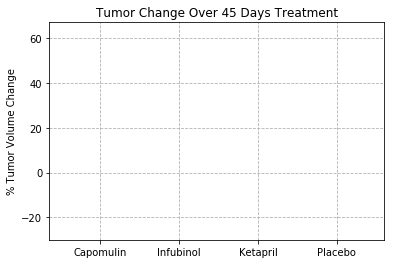

In [90]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
x = plt.subplot()
x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(drug))
plt.ylim(-30, max(totaltumor_volume_change) + 10)
plt.grid(True, linestyle='dashed')

plt.xticks(tick_locations, drug)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']
colors = []
for value in totaltumor_volume_change:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
percents=ax.bar(x_axis, totaltumor_volume_change, color=colors, alpha=0.75, align="edge")
def autolabel(percents, ax):

    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for percent in percents:
        height = percent.get_height()
       
        ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', va='center')

autolabel(percents, ax)

plt.savefig("TumorChange_Over_45_Days_Treatment.png")
plt.show()

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

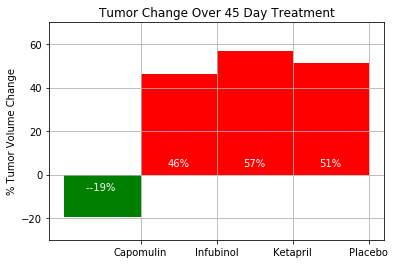